In [11]:
!pip install pandas matplotlib
!pip install sqlalchemy mysql-connector-python

In [29]:
import pandas as pd # primary data structure library
import numpy as np  # useful for many scientific computing in Python
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from sqlalchemy import create_engine
from credentials import mysql_username, mysql_password

In [51]:
# Database connection using SQLAlchemy
database_username = mysql_username
database_password = mysql_password
database_ip       = 'localhost'
database_name     = 'creditcard_capstone'
database_connection = create_engine(f'mysql+pymysql://{database_username}:{database_password}@{database_ip}/{database_name}')


In [87]:
# 1. Percentage of applications approved for self-employed applicants
query1 = """
SELECT Application_Status, Self_Employed, COUNT(*) as count
FROM cdw_sapp_loan_application
WHERE Self_Employed = 'Yes'
GROUP BY Application_Status, Self_Employed;
"""

df1 = pd.read_sql(query1, database_connection)
print(df1)

  Application_Status Self_Employed  count
0                  Y           Yes     46
1                  N           Yes     24


In [78]:

approved_count = df1[df1["Application_Status"] == "Approved"]["count"].iloc[0]
total_count = df1["count"].sum()
percent_approved = (approved_count / total_count) * 100

plt.figure()
plt.pie([percent_approved, 100 - percent_approved], labels=["Approved", "Not Approved"], autopct='%1.1f%%')
plt.title("Percentage of Applications Approved for Self-Employed Applicants")
plt.show()


IndexError: single positional indexer is out-of-bounds

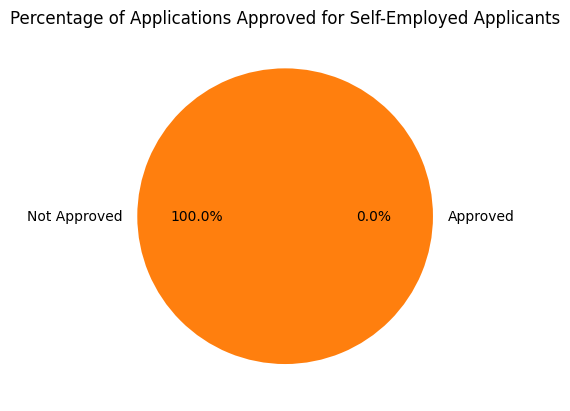

In [79]:
df1 = pd.read_sql(query1, database_connection)
total_count = df1["count"].sum()

# Check if 'Approved' status exists in the data
if 'Approved' in df1["Application_Status"].values:
    approved_count = df1[df1["Application_Status"] == "Approved"]["count"].iloc[0]
    percent_approved = (approved_count / total_count) * 100
else:
    percent_approved = 0

plt.figure()
plt.pie([percent_approved, 100 - percent_approved], labels=["Approved", "Not Approved"], autopct='%1.1f%%')
plt.title("Percentage of Applications Approved for Self-Employed Applicants")
plt.show()


In [88]:
# 2. Percentage of rejection for married male applicants
query2 = """
SELECT Application_Status, COUNT(*) as count
FROM cdw_sapp_loan_application
WHERE Married = 'Yes' AND Gender = 'Male'
GROUP BY Application_Status;
"""
df2 = pd.read_sql(query2, database_connection)
print(df2)

  Application_Status  count
0                  N     87
1                  Y    219


In [55]:

rejected_count = df2[df2["Application_Status"] == "Rejected"]["count"].iloc[0]
total_married_male_count = df2["count"].sum()
percent_rejected = (rejected_count / total_married_male_count) * 100
print(f"Percentage of Rejection for Married Male Applicants: {percent_rejected:.2f}%")

IndexError: single positional indexer is out-of-bounds

In [85]:
df2 = pd.read_sql(query2, database_connection)
total_married_male_count = df2["count"].sum()

# Check if 'Rejected' status exists in the data
if 'Rejected' in df2["Application_Status"].values:
    rejected_count = df2[df2["Application_Status"] == "Rejected"]["count"].iloc[0]
    percent_rejected = (rejected_count / total_married_male_count) * 100
else:
    percent_rejected = 0

print(f"Percentage of Rejection for Married Male Applicants: {percent_rejected:.2f}%")


Percentage of Rejection for Married Male Applicants: 0.00%


In [89]:
# 3. Top three months with the largest volume of transaction data
query3 = """
SELECT 
    SUBSTRING(TIMEID, 1, 4) AS year, 
    SUBSTRING(TIMEID, 5, 2) AS month,  
    SUM(transaction_value) AS total 
FROM cdw_sapp_credit_card 
GROUP BY year, month
ORDER BY total DESC 
LIMIT 3;
"""

df3 = pd.read_sql(query3, database_connection)
print(df3)

   year month      total
0  2018    10  202583.89
1  2018    05  201310.26
2  2018    12  201251.08


<Figure size 640x480 with 0 Axes>

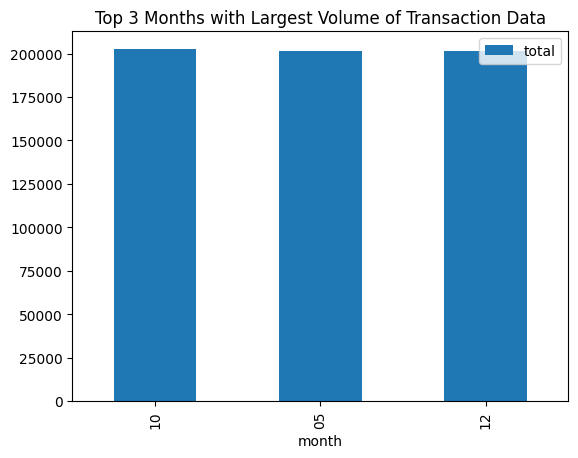

In [90]:

plt.figure()
df3.plot(x="month", y="total", kind="bar", title="Top 3 Months with Largest Volume of Transaction Data")
plt.show()


In [91]:
# 4. Branch with highest total dollar value of healthcare transactions
query4 = """
SELECT BRANCH_CODE, 
       SUM(transaction_value) AS Total_Transaction_Value
FROM cdw_sapp_credit_card 
WHERE TRANSACTION_TYPE = 'healthcare' 
GROUP BY BRANCH_CODE 
ORDER BY Total_Transaction_Value DESC 
LIMIT 1;
"""

df4 = pd.read_sql(query4, database_connection)
print(df4)

   BRANCH_CODE  Total_Transaction_Value
0           25                  4370.18


In [59]:

print(f"Branch with Highest Total Dollar Value of Healthcare Transactions: {df4['BRANCH_CODE'].iloc[0]} with {df4['Total_Transaction_Value'].iloc[0]} total value")


Branch with Highest Total Dollar Value of Healthcare Transactions: 25 with 4370.1799999999985 total value


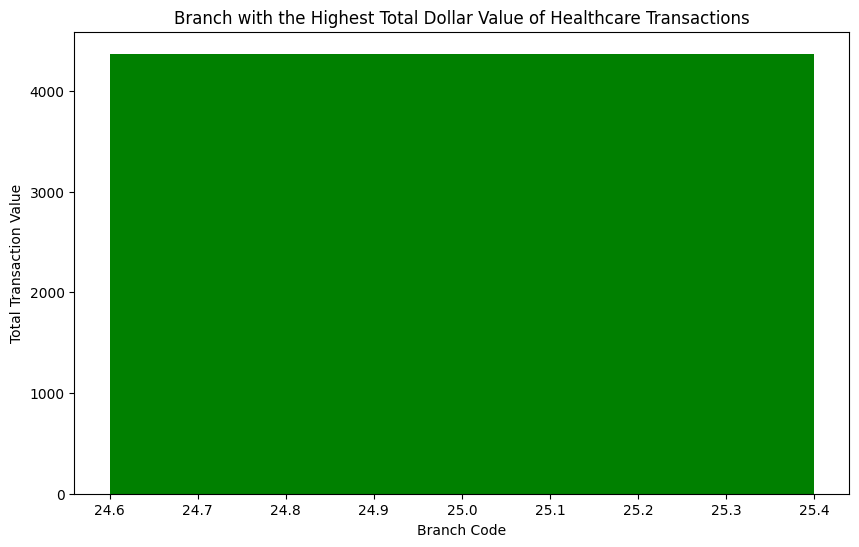

In [72]:
# Plotting the result
plt.figure(figsize=(10, 6))
plt.bar(df4["BRANCH_CODE"], df4["Total_Transaction_Value"], color='green')
plt.xlabel("Branch Code")
plt.ylabel("Total Transaction Value")
plt.title("Branch with the Highest Total Dollar Value of Healthcare Transactions")
plt.show()

In [62]:
# Fetching data for top 3 branches with highest total dollar value of healthcare transactions
query_top3 = """
SELECT BRANCH_CODE, 
       SUM(transaction_value) AS Total_Transaction_Value
FROM cdw_sapp_credit_card 
WHERE TRANSACTION_TYPE = 'healthcare' 
GROUP BY BRANCH_CODE 
ORDER BY Total_Transaction_Value DESC 
LIMIT 3;
"""

In [63]:
df_top3 = pd.read_sql(query_top3, database_connection)

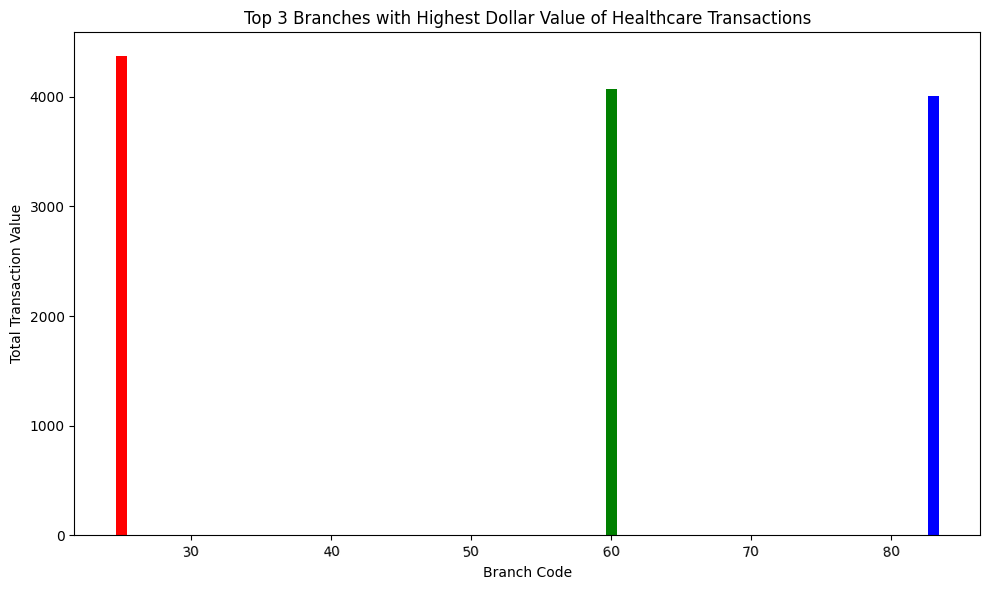

In [74]:
# Plotting the results
plt.figure(figsize=(10, 6))
plt.bar(df_top3["BRANCH_CODE"], df_top3["Total_Transaction_Value"], color=['red', 'green', 'blue'])
plt.xlabel("Branch Code")
plt.ylabel("Total Transaction Value")
plt.title("Top 3 Branches with Highest Dollar Value of Healthcare Transactions")
plt.xticks(rotation=5)
plt.tight_layout()
plt.show()

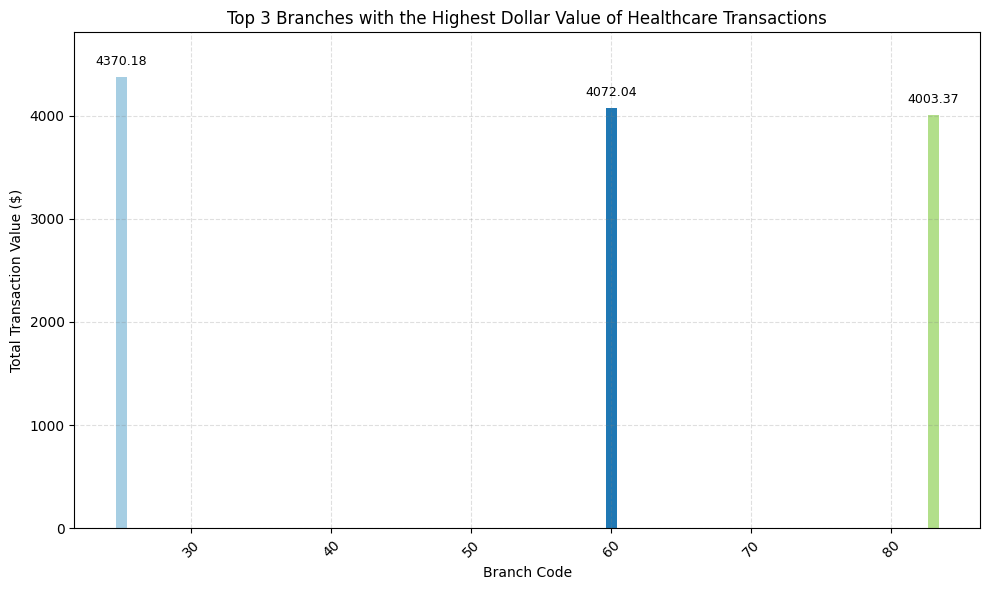

In [76]:
# Plotting the results
plt.figure(figsize=(10, 6))
bars = plt.bar(df_top3["BRANCH_CODE"], df_top3["Total_Transaction_Value"], color=plt.cm.Paired.colors)

# Adding labels and titles
plt.xlabel("Branch Code")
plt.ylabel("Total Transaction Value ($)")
plt.title("Top 3 Branches with the Highest Dollar Value of Healthcare Transactions")

# Adding horizontal grid lines
plt.gca().yaxis.grid(True, linestyle='--', which='major', color='grey', alpha=.25)

plt.gca().xaxis.grid(True, linestyle='--', which='major', color='grey', alpha=.25)


# Ensure the y-axis starts from zero
plt.ylim(0, df_top3["Total_Transaction_Value"].max() + (0.1 * df_top3["Total_Transaction_Value"].max()))

# Adding data labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + (0.02 * df_top3["Total_Transaction_Value"].max()), round(yval, 2), ha='center', va='bottom', fontsize=9)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

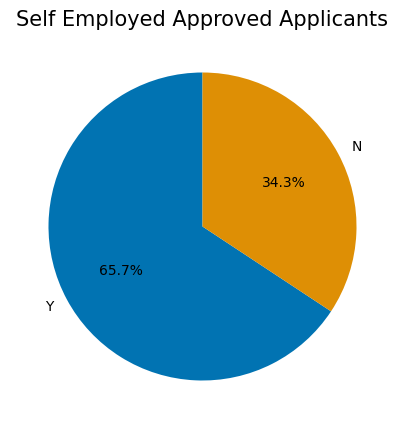

In [44]:
plt.figure(figsize=(5, 5))
colors = sns.color_palette('colorblind')
plt.pie(df_loan_app['count'], labels=df_loan_app['Application_Status'], autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Self Employed Approved Applicants', fontsize=15)

plt.show()

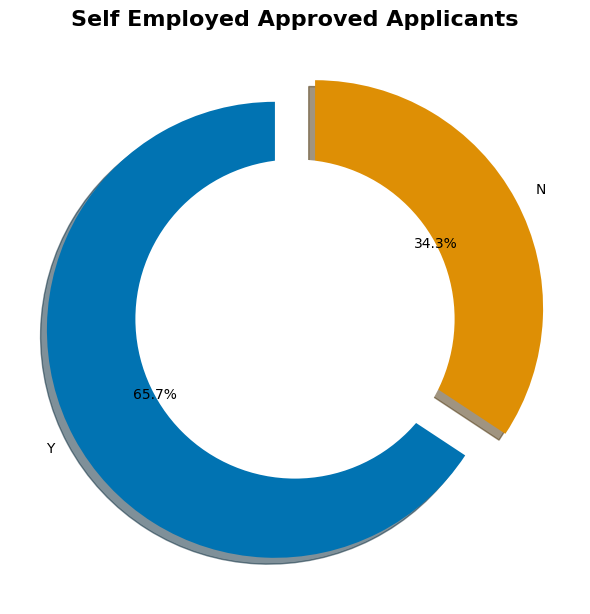

In [42]:
# Set Figure Size
plt.figure(figsize=(8, 6))

# Colors
colors = sns.color_palette('colorblind')

# Explode values
explode = (0.1, 0.1) if len(df_loan_app['count']) == 2 else tuple([0.1]*len(df_loan_app['count']))

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
plt.pie(df_loan_app['count'], labels=df_loan_app['Application_Status'], autopct='%1.1f%%', startangle=90, 
        colors=colors, explode=explode, shadow=True)

# Draw a circle at the center of pie to make it look like a donut
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()

# Title
plt.title('Self Employed Approved Applicants', fontsize=16, fontweight='bold')

# Show
plt.show()
